In [1]:
data = read.table("videodata.txt", header = TRUE)
table = head(data)
table

Warning message in file(file, "rt"):
“cannot open file 'videodata.txt': No such file or directory”


ERROR: ignored

In [ ]:
summary(data)

      time             like            where            freq      
 Min.   : 0.000   Min.   : 1.000   Min.   : 1.00   Min.   : 1.00  
 1st Qu.: 0.000   1st Qu.: 2.000   1st Qu.: 3.00   1st Qu.: 2.00  
 Median : 0.000   Median : 3.000   Median : 3.00   Median : 3.00  
 Mean   : 1.243   Mean   : 4.077   Mean   :21.97   Mean   :16.46  
 3rd Qu.: 1.250   3rd Qu.: 3.000   3rd Qu.: 5.00   3rd Qu.: 4.00  
 Max.   :30.000   Max.   :99.000   Max.   :99.00   Max.   :99.00  
      busy            educ            sex              age       
 Min.   : 0.00   Min.   : 0.00   Min.   :0.0000   Min.   :18.00  
 1st Qu.: 0.00   1st Qu.: 0.00   1st Qu.:0.0000   1st Qu.:19.00  
 Median : 0.00   Median : 1.00   Median :1.0000   Median :19.00  
 Mean   :12.15   Mean   :14.55   Mean   :0.5824   Mean   :19.52  
 3rd Qu.: 1.00   3rd Qu.: 1.00   3rd Qu.:1.0000   3rd Qu.:20.00  
 Max.   :99.00   Max.   :99.00   Max.   :1.0000   Max.   :33.00  
      home             math             work            own        
 


1.   Point estimate
2.   Interval estimate






Find point estimate for the fraction of students who played a video game in the week prior to the survey


In [ ]:
time_column = data['time']

In [ ]:
max(time_column) #no extraneous value at the "time" column

[1] 30

In [ ]:
played_index = which(data$time > 0)
data.played = data[played_index,]
#count number of rows
num_of_students_played = nrow(data.played)
total_num_of_respondents = nrow(data)
cat("Number of students who played:", num_of_students_played, "\nTotal number of respondents:", total_num_of_respondents)

Number of students who played: 34 
Total number of respondents: 91

In [ ]:
#calculate point estimate
point_estimate_fraction_played = num_of_students_played/total_num_of_respondents
point_estimate_fraction_played

[1] 0.3736264

Find interval estimate for the fraction of students who played a video game in the week prior to the survey

In [ ]:
#bootstrap to find the average point estimate (fraction of students who played)
#we will sample the dataset with replication
library(boot)

In [ ]:
#function to calculate fraction from sample
func = function(data, indices=1:91){
  d = data[indices,]
  frac = nrow(d[which(d$time>0),])/nrow(d)
  return(frac)
}
#bootstrap with 1000 replications
results = boot(data, statistic=func, R=1000, stype="i")
results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = func, R = 1000, stype = "i")


Bootstrap Statistics :
     original        bias    std. error
t1* 0.3736264 -0.0004615385  0.05032824

In [ ]:
boot.ci(results, type = "basic")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "basic")

Intervals : 
Level      Basic         
95%   ( 0.2747,  0.4725 )  
Calculations and Intervals on Original Scale

Using the basic bootstrap method to calculate interval estimate, we found that the 95% confidence interval of the proportion of students who played a video game is [0.275, 0.473], that is between 27 to 47 students approximately.

# Amount of time spent playing video games in the week prior to the survey VS reported frequency of play







Assumption: A student typically plays 2 hours of video games each time

Based on this assumption, the ideal amount of time spent playing video games in a week based on the frequency of play is as follows:
1.   Daily = 14 hours
2.   Weekly = 2 hours
3. Monthly = 0.5 hour (can be up to 2 hours if student plays once)
4. Semesterly = 0.167 hour (can be up to 2 hours if student plays once)

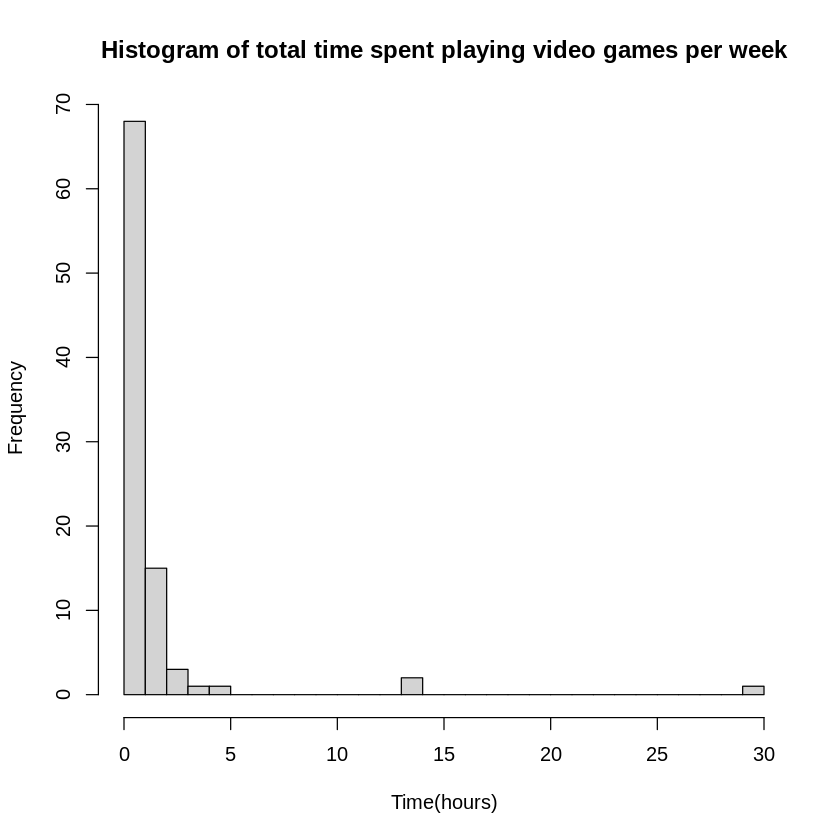

In [ ]:
#overview of amount of time spent playing video games
hist(data$time, 30, main = "Histogram of total time spent playing video games per week", xlab = "Time(hours)")

Number of students who play daily: 9

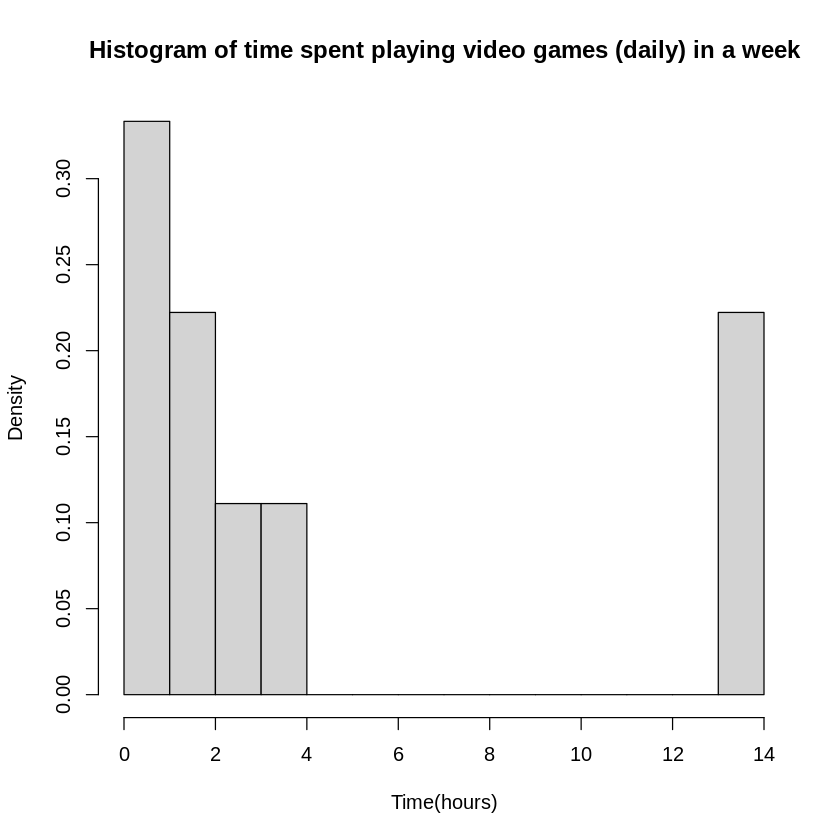

In [ ]:
#subsets of data based on frequency of play
#subset1: daily
daily_subset = data[which(data$freq == 1),]
cat("Number of students who play daily:", nrow(daily_subset))
hist(daily_subset$time, 15, freq = FALSE, main = "Histogram of time spent playing video games (daily) in a week", xlab = "Time(hours)")

Number of students who play weekly: 28

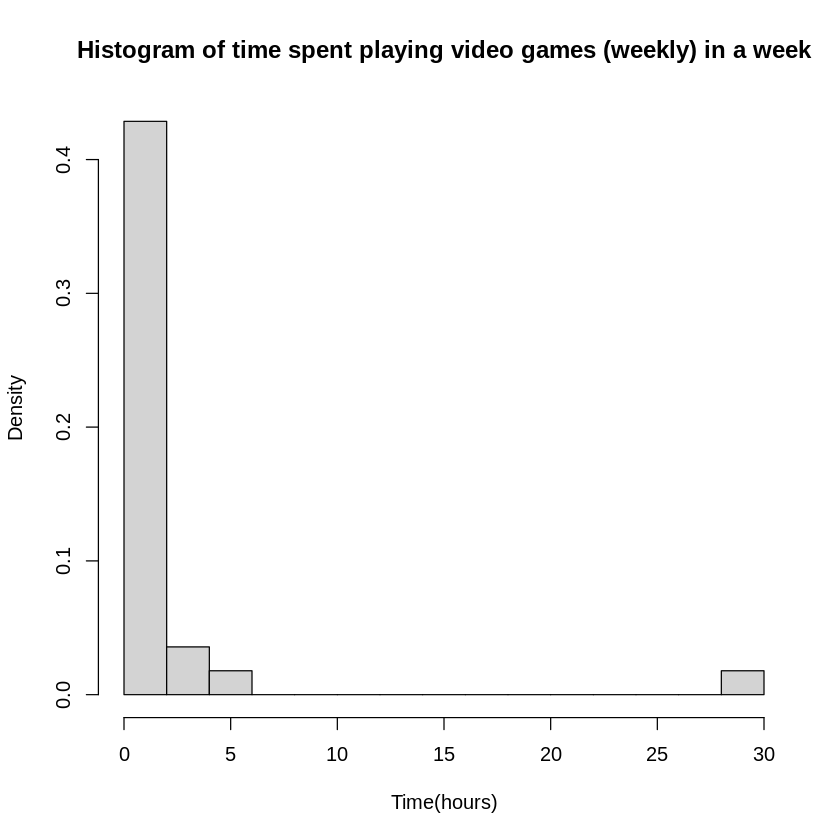

In [ ]:
#subsets of data based on frequency of play
#subset2: weekly
weekly_subset = data[which(data$freq == 2),]
cat("Number of students who play weekly:", nrow(weekly_subset))
hist(weekly_subset$time, 15, freq = FALSE, main = "Histogram of time spent playing video games (weekly) in a week", xlab = "Time(hours)")

Number of students who play monthly: 18

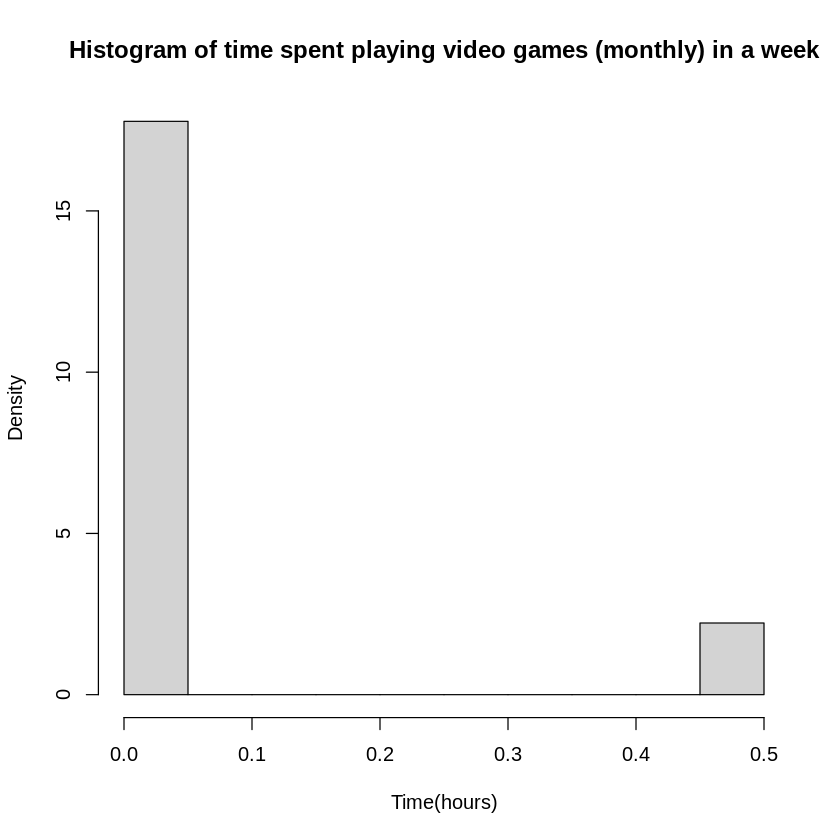

In [ ]:
#subsets of data based on frequency of play
#subset3: monthly
monthly_subset = data[which(data$freq == 3),]
cat("Number of students who play monthly:", nrow(monthly_subset))
hist(monthly_subset$time, 15, freq = FALSE, main = "Histogram of time spent playing video games (monthly) in a week", xlab = "Time(hours)")

Number of students who play semesterly: 23

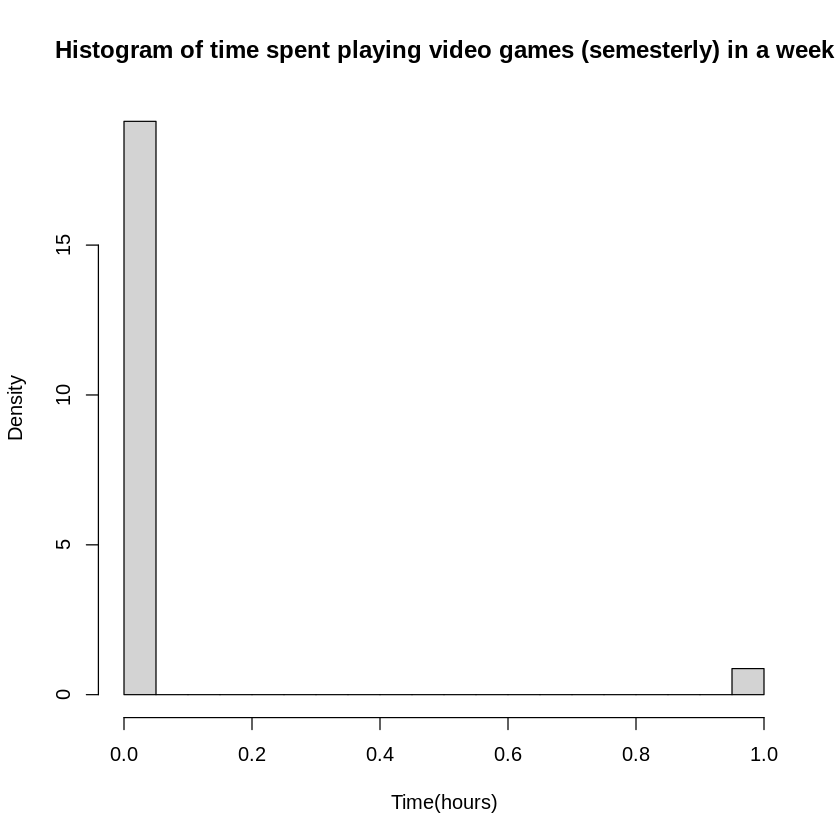

In [ ]:
#subsets of data based on frequency of play
#subset4: semesterly
semesterly_subset = data[which(data$freq == 4),]
cat("Number of students who play semesterly:", nrow(semesterly_subset))
hist(semesterly_subset$time, 15, freq = FALSE, main = "Histogram of time spent playing video games (semesterly) in a week", xlab = "Time(hours)")

Consider external factors:


1.   Student loves/hates math
2.   Student plays when they are busy or not



First, we will examine the 1st quartile of time spent = 0 hour

In [ ]:
#from the summary of data above, we know that 1st quartile of time spent is 0 hour
q1_subset = data[which(data$time == 0.0),]
q1_hate_math = nrow(q1_subset[which(q1_subset$math == 1),])/nrow(q1_subset)
q1_play_if_busy = nrow(q1_subset[which(q1_subset$busy == 1),])/nrow(q1_subset)
cat("Proportion of students who hate math:", q1_hate_math, 
"\nProportion of students who love math:", 1 - q1_hate_math,
"\nProportion of students who play even when they are busy:", q1_play_if_busy)

#hate math but DOES NOT play when they are busy 
#(assume they work hard for the test)
q1_busy_for_test = nrow(q1_subset[which(q1_subset$math == 1 & 
q1_subset$busy == 0),])/nrow(q1_subset[which(q1_subset$math == 1),])
cat("\nProportion of students who does not play if busy given they hate math:",
q1_busy_for_test)

Proportion of students who hate math: 0.4210526 
Proportion of students who love math: 0.5789474 
Proportion of students who play even when they are busy: 0.05263158
Proportion of students who does not play if busy given they hate math: 0.7083333

Quite a significant proportion of students does not like math, however this can be justified by the fact that this group of students normally do not play when they are busy, assuming they are busy preparing for the test. Among students who hate math, approximately 71% of them do not play video games if they are busy.

Next, we will examine the students with time spent greater than the 3rd quartile = 1.25 hours

In [ ]:
#from the summary of data above, we know that 3rd quartile of time spent is 1.25 hours
q3_subset = data[which(data$time > 1.250),]
q3_hate_math = nrow(q3_subset[which(q3_subset$math == 1),])/nrow(q3_subset)
q3_play_if_busy = nrow(q3_subset[which(q3_subset$busy == 1),])/nrow(q3_subset)
cat("Proportion of students who hate math:", q3_hate_math, 
"\nProportion of students who love math:", 1 - q3_hate_math,
"\nProportion of students who play even when they are busy:", q3_play_if_busy)

#love math and play when they are busy 
#(assume they work equally hard for the test)
q3_busy_for_test = nrow(q3_subset[which(q3_subset$math == 0 & 
q3_subset$busy == 0),])/nrow(q3_subset[which(q3_subset$math == 0),])
cat("\nProportion of students who play if busy given they love math:",
q3_busy_for_test)

Proportion of students who hate math: 0.08695652 
Proportion of students who love math: 0.9130435 
Proportion of students who play even when they are busy: 0.5217391
Proportion of students who play if busy given they love math: 0.4761905

Very low proportion of students does not like math (less than 0.1%), most of them like math. However, more than half (52%) of them play video games even when they are busy, which can be one of the reasons why they spend more time playing video games than their peers. Among the majority who loves math, close to half (aprrox. 48% of students) play video games when they are busy. 

Finally, benchmarking to our assumption

In [ ]:
#by assumption, playing daily = 14hours per week
#playing weekly = 2hours per week
#playing monthly = 0.5hour per week
#playing semesterly = 0.167hour per week
over_subset = data[which((data$freq == 1 & data$time >= 14) | 
(data$freq == 2 & data$time >= 2) |
(data$freq == 3 & data$time >= 0.5) | 
(data$freq == 4 & data$time >= 0.167)),]

cat("Proportion of students who played equal or more than the assumed time spent:", nrow(over_subset))

#now let's check their behaviour (hate math and play if busy)
over_hate_math = nrow(over_subset[which(over_subset$math == 1),])/nrow(over_subset)
over_play_if_busy = nrow(over_subset[which(over_subset$busy == 1),])/nrow(over_subset)
cat("\nProportion of students who hate math:", over_hate_math, 
"\nProportion of students who love math:", 1 - over_hate_math,
"\nProportion of students who play even when they are busy:", over_play_if_busy)

Proportion of students who played equal or more than the assumed time spent: 21
Proportion of students who hate math: 0.04761905 
Proportion of students who love math: 0.952381 
Proportion of students who play even when they are busy: 0.4285714

Surprisingly (or maybe not), a small proportion of them (approximately 0.05%) hates math. However, quite a significant proportion of them (more than 40%) plays games even when they are busy.

Conclusion: It seems like the amount of time spent playing video games in the week is more associated with the students' habit of playing games (or not) when they are busy than whether they like math or not. This is based on the assumption that all students work equally hard for the test and they are busy preparing for the test.




1.   Point estimate
2.   Interval estimate


The average amount of time spent playing video games in the week prior to the survey








In [ ]:
mean_time = mean(data$time)
cat("Point estimate of average amount of time spent:", mean_time)

Point estimate of average amount of time spent: 1.242857

In [ ]:
########## Added cell ############
# still settle on the above answer, but just to see the impact of removing outliers:
# throw out 30 hours outlier
mean_wo_30 = mean(data[which(data$time < 30),]$time)
cat("Point estimate of average amount of time spent, removing 30-hour outlier:", mean_wo_30)

# throw out 30 hours and 14 hours outlier
mean_wo_14_30 = mean(data[which(data$time < 14),]$time)
cat("\nPoint estimate of average amount of time spent, removing 14-hour and 30-hour outliers:", mean_wo_14_30)

Point estimate of average amount of time spent, removing 30-hour outlier: 0.9233333
Point estimate of average amount of time spent, removing 14-hour and 30-hour outliers: 0.6261364

In [ ]:
sd_time = sd(data$time)
upper_bound = mean_time + 2*sd_time/sqrt(nrow(data))
lower_bound = mean_time - 2*sd_time/sqrt(nrow(data))
cat("95% confidence interval of average amount of time spent: [", lower_bound,
",", upper_bound, "]")

95% confidence interval of average amount of time spent: [ 0.4509744 , 2.03474 ]

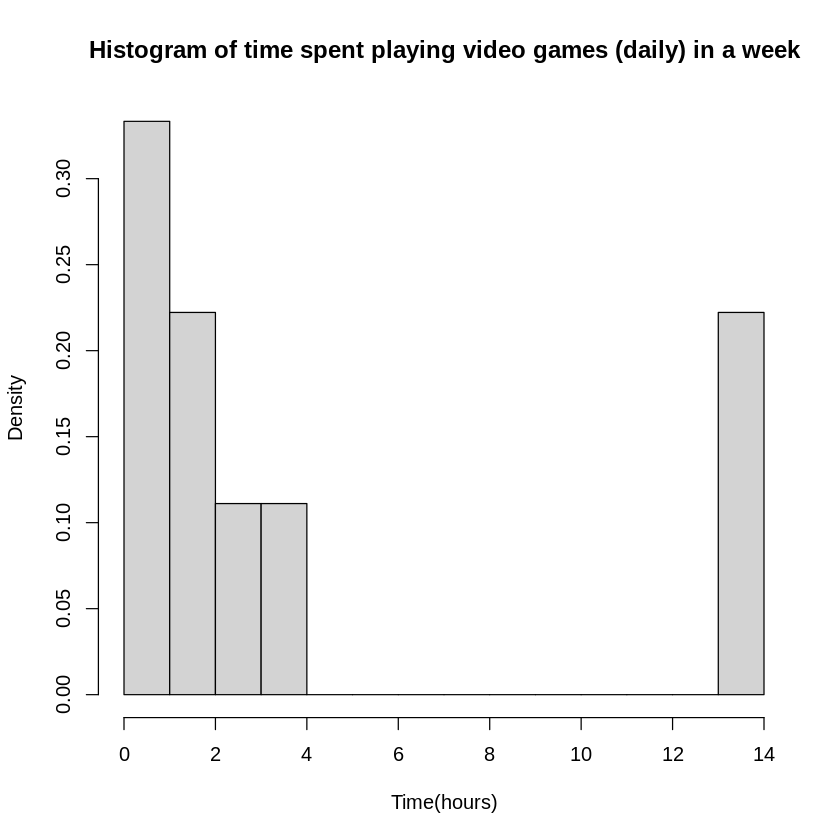

In [ ]:
#Review of shape of distribution of time spent
hist(daily_subset$time, 15, freq = FALSE, main = "Histogram of time spent playing video games (daily) in a week", xlab = "Time(hours)")

Simulation study - Bootstrap to determine the appropriateness of the interval estimate


In [ ]:
#function to calculate mean time of sample
func = function(data, indices=1:91){
  d = data[indices,]
  avg_time = mean(d$time)
  return(avg_time)
}
#bootstrap with 1000 replications
boot2_results = boot(data, statistic=func, R=1000, stype="i")
boot2_results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = func, R = 1000, stype = "i")


Bootstrap Statistics :
    original       bias    std. error
t1* 1.242857 -0.004840659   0.3834618

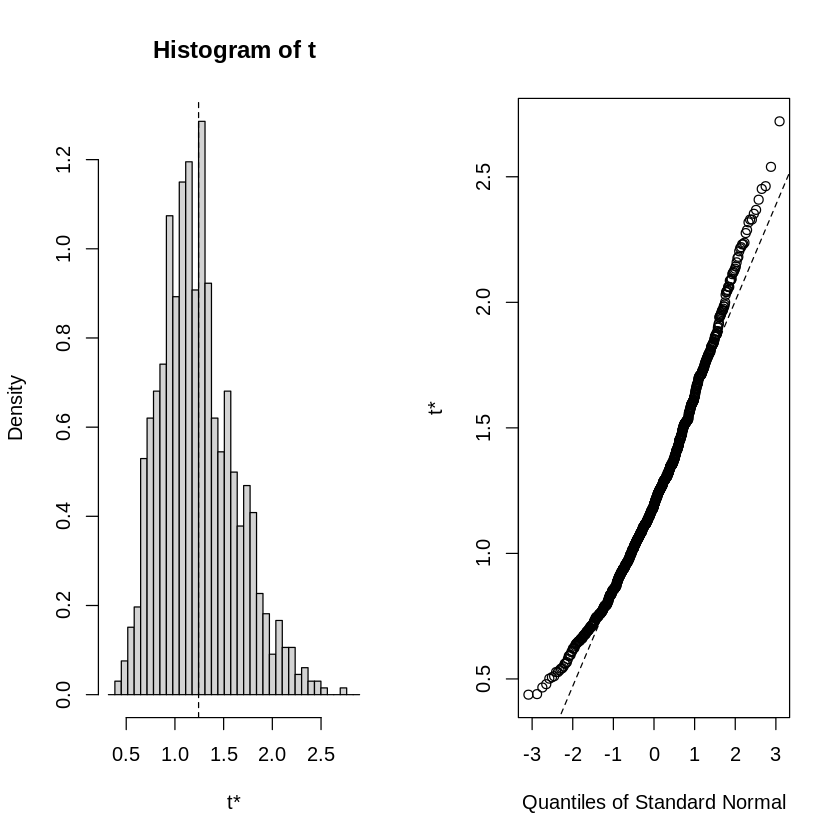

In [ ]:
plot(boot2_results)

In [ ]:
boot.ci(boot2_results, type = "basic")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot2_results, type = "basic")

Intervals : 
Level      Basic         
95%   ( 0.365,  1.862 )  
Calculations and Intervals on Original Scale

In [ ]:
#finding ways to plot the intervals

# Investigate if students enjoy playing video games in general







In [ ]:
follow_up_data = read.table("videoMultiple.txt", header = TRUE)
follow_up_table = head(follow_up_data)
follow_up_table

,action,adv,sim,sport,strategy,relax,coord,challenge,master,bored,⋯,graphic,time,frust,lonely,rules,cost,boring,friends,point,other2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0,0,0,0,1,1,0,1,1,0,⋯,0,1,0,0,0,1,0,0,1,
2,0,1,0,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,
3,1,0,0,1,1,1,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,
4,0,0,0,0,1,0,0,1,0,0,⋯,0,1,0,0,0,0,0,0,0,
5,0,0,0,0,1,1,0,1,1,0,⋯,0,0,0,0,1,1,0,0,0,
6,1,0,0,1,1,1,0,0,1,1,⋯,0,1,1,0,0,1,0,0,0,


In [ ]:
summary(follow_up_data)

     action            adv              sim             sport       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.5172   Mean   :0.2874   Mean   :0.1724   Mean   :0.3908  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 NA's   :4        NA's   :4        NA's   :4        NA's   :4       
    strategy          relax            coord           challenge     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.00000   Median :0.0000  
 Mean   :0.6322   Mean   :0.6667   Mean   :0.04598   Mean   :0.2414  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.

Note that there are 4 extraneous values (NA) in the data

In [ ]:
library(tidyverse)

In [ ]:
#select all the columns that answer the first follow up question
q1_column = follow_up_data %>% select("action", "adv", "sim", "sport", "strategy")
q1_table = head(q1_column)
q1_table

,action,adv,sim,sport,strategy
,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1
2,0,1,0,0,1
3,1,0,0,1,1
4,0,0,0,0,1
5,0,0,0,0,1
6,1,0,0,1,1


In [ ]:
#select all the columns that answer the second follow up question
q2_column = follow_up_data %>% select("relax", "coord", "challenge", "master", "bored", "other")
q2_table = head(q2_column)
q2_table

,relax,coord,challenge,master,bored,other
,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,0,1,1,0,
2,0,0,0,0,1,
3,1,0,0,0,0,
4,0,0,1,0,0,
5,1,0,1,1,0,
6,1,0,0,1,1,


In [ ]:
#select all the columns that answer the third follow up question
q3_column = follow_up_data %>% select("graphic", "time", "frust", "lonely", "rules", "cost", "boring", "friends", "point", "other2")
q3_table = head(q3_column)
q3_table

,graphic,time,frust,lonely,rules,cost,boring,friends,point,other2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0,1,0,0,0,1,0,0,1,
2,0,1,1,0,0,0,0,0,0,
3,0,0,0,0,0,1,0,0,0,
4,0,1,0,0,0,0,0,0,0,
5,0,0,0,0,1,1,0,0,0,
6,0,1,1,0,0,1,0,0,0,


In [ ]:
nrow(q1_column)

[1] 91

In [ ]:
nrow(q2_column)

[1] 91

In [ ]:
nrow(q3_column)

[1] 91

In [ ]:
#seems like we need to count the number of 1s
#students who did not choose that option or did not answer at all are automatically assigned a 0
#also students are allowed to choose multiple options
#so we have to find the number of rows with all 0s (NA for other)
num_no_ans1 = nrow(q1_column[which(q1_column$action == 0 & q1_column$adv == 0 & q1_column$sim == 0 & q1_column$sport == 0 & q1_column$strategy == 0),]) 
cat("Number of students who did not answer Q1:", num_no_ans1)

Number of students who did not answer Q1: 12

In [ ]:
num_no_ans2 = nrow(q2_column[which(q2_column$relax == 0 & q2_column$coord == 0 & q2_column$challenge == 0 & q2_column$master == 0 & q2_column$bored == 0 & q2_column$other == " "),]) 
cat("Number of students who did not answer Q2:", num_no_ans2)

Number of students who did not answer Q2: 13

In [ ]:
#let's cross check the number with the number of students who indicated 
#1 (never played), 4 (not really) and 5 (not at all) in the first survey
num_dislike = nrow(data[which(data$like == 1 | data$like == 5 | data$like == 4),])
num_like = nrow(data[which(data$like == 2 | data$like == 3),])
cat("Number of students who did not like to play or never played:", num_dislike)
cat("\nNumber of students who like to play:", num_like)

Number of students who did not like to play or never played: 21
Number of students who like to play: 69

Total number of students who indicated that they don't really like playing games or never played is 21, while the number of those who really skipped the questions is 13, seems like some students answered both Q1 & Q2 though they were instructed to not. 

Number of students who like and did not like does not sum up to 91, due to one extraneous value (99)

# Sentiment Analysis
To measure the sentiment, perhaps we could set for follow-up Q2 and Q3 if at any row (one student) has more than 2 entries (noted as 1), it is considered as very positive or very negative.

In [ ]:
#for question 2
#first remove the last column as it is not int
q2_removed_other = q2_column[-6]
q2_row_sum = rowSums(q2_removed_other)
#add row_sum column
q2.data.with.rowSum <- cbind(q2_column, row_sum = q2_row_sum)
#count number of rows with more than 2 entries
num_very_positive = nrow(q2.data.with.rowSum[which(q2.data.with.rowSum$row_sum > 2),])
cat("Number of very positive responses:", num_very_positive)
cat("\nProportion of very positive responses:", num_very_positive/(nrow(q2_column) - num_no_ans2 - 4))

Number of very positive responses: 18
Proportion of very positive responses: 0.2432432

In [ ]:
#for question 3
#first remove the last column as it is not int
q3_removed_other = q3_column[-10]
q3_row_sum = rowSums(q3_removed_other)
q3.data.with.rowSum <- cbind(q3_column, row_sum = q3_row_sum)
num_very_negative = nrow(q3.data.with.rowSum[which(q3.data.with.rowSum$row_sum > 2),])
cat("Number of very negative responses:", num_very_negative)
cat("\nProportion of very negative responses:", num_very_negative/(nrow(q3_column) - 4))

Number of very negative responses: 36
Proportion of very negative responses: 0.4137931

Conclusion: There seem to be more negative responses than positive responses. However, there are other factors that affect the results, for example we removed rows with "NA" and did not consider the "other" column, also, there are more options for Q3 than for Q2 

# Look for the differences between those who like to play video games and those who don’t.

Comparisons between:
1. Male and female
2. Work for pay and don’t
3. With computer and without








Given the scale for like to play, we categorize into two:
1. Those who like to play video games: 2 (very much) and 3 (somewhat)
2. Those who don't like to play video games: 1 (never played), 4 (not really) and 5 (not at all)

In [ ]:
#create two subsets of data (like and dislike)
like_data = data[which(data$like == 2 | data$like == 3),]
dislike_data = data[which(data$like == 1 | data$like == 5 | data$like == 4),]

Comparison between male and female 

In [ ]:
#first, compare between male (1) and female (0)
#students who like playing video games
num_male_like = nrow(like_data[which(like_data$sex == 1),])
num_female_like = nrow(like_data[which(like_data$sex == 0),])
m_like_pro = num_male_like/(nrow(like_data) + nrow(dislike_data))
f_like_pro = num_female_like/(nrow(like_data) + nrow(dislike_data))
cat("Proportion of male who like gaming:", m_like_pro)
cat("\nProportion of female who like gaming:", f_like_pro)

num_male_dislike = nrow(dislike_data[which(dislike_data$sex == 1),])
num_female_dislike = nrow(dislike_data[which(dislike_data$sex == 0),])
m_dislike_pro = num_male_dislike/(nrow(like_data) + nrow(dislike_data))
f_dislike_pro = num_female_dislike/(nrow(like_data) + nrow(dislike_data))
cat("\nProportion of male who dislike gaming:", m_dislike_pro)
cat("\nProportion of female who dislike gaming:", f_dislike_pro)

Proportion of male who like gaming: 0.4777778
Proportion of female who like gaming: 0.2888889
Proportion of male who dislike gaming: 0.1
Proportion of female who dislike gaming: 0.1333333

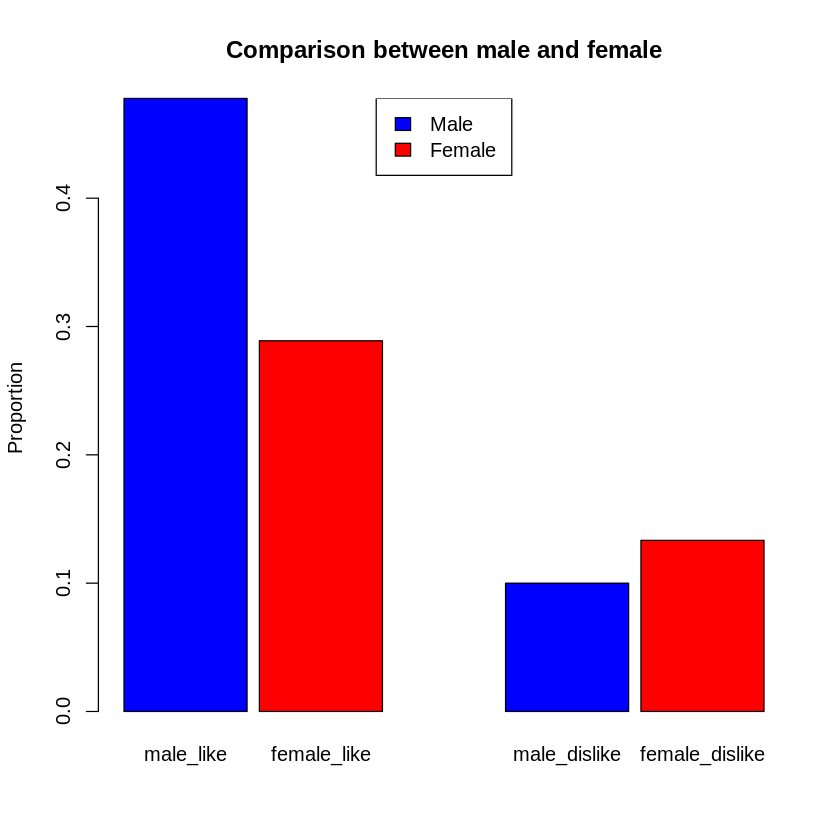

In [ ]:
sex_pro_vector = c(m_like_pro, f_like_pro, m_dislike_pro, f_dislike_pro)
label_vector1 = c("male_like", "female_like", "male_dislike", "female_dislike")
barplot(sex_pro_vector, main = "Comparison between male and female", ylab = "Proportion", names.arg = label_vector1, col = c("blue", "red"), space=c(0.1,0.1,1.0,0.1))
legend("top", c("Male", "Female"), cex = 1.0, fill = c("blue", "red"))

Comparison between those who work for pay and those who don't

In [ ]:
num_work_like = nrow(like_data[which(like_data$work > 0 & like_data$work != 99),])
num_nowork_like = nrow(like_data[which(like_data$work == 0),])
work_like_pro = num_work_like/(nrow(like_data) + nrow(dislike_data))
noWork_like_pro = num_nowork_like/(nrow(like_data) + nrow(dislike_data))
cat("Proportion of those who work and like gaming:", work_like_pro)
cat("\nProportion of those who don't work and like gaming:", noWork_like_pro)

num_work_dislike = nrow(dislike_data[which(dislike_data$work > 0 & dislike_data$work != 99),])
num_nowork_dislike = nrow(dislike_data[which(dislike_data$work == 0),])
work_dislike_pro = num_work_dislike/(nrow(like_data) + nrow(dislike_data))
noWork_dislike_pro = num_nowork_dislike/(nrow(like_data) + nrow(dislike_data))
cat("\nProportion of those who work and dislike gaming:", work_dislike_pro)
cat("\nProportion of those who don't work and dislike gaming:", noWork_dislike_pro)

Proportion of those who work and like gaming: 0.4
Proportion of those who don't work and like gaming: 0.3333333
Proportion of those who work and dislike gaming: 0.07777778
Proportion of those who don't work and dislike gaming: 0.1555556

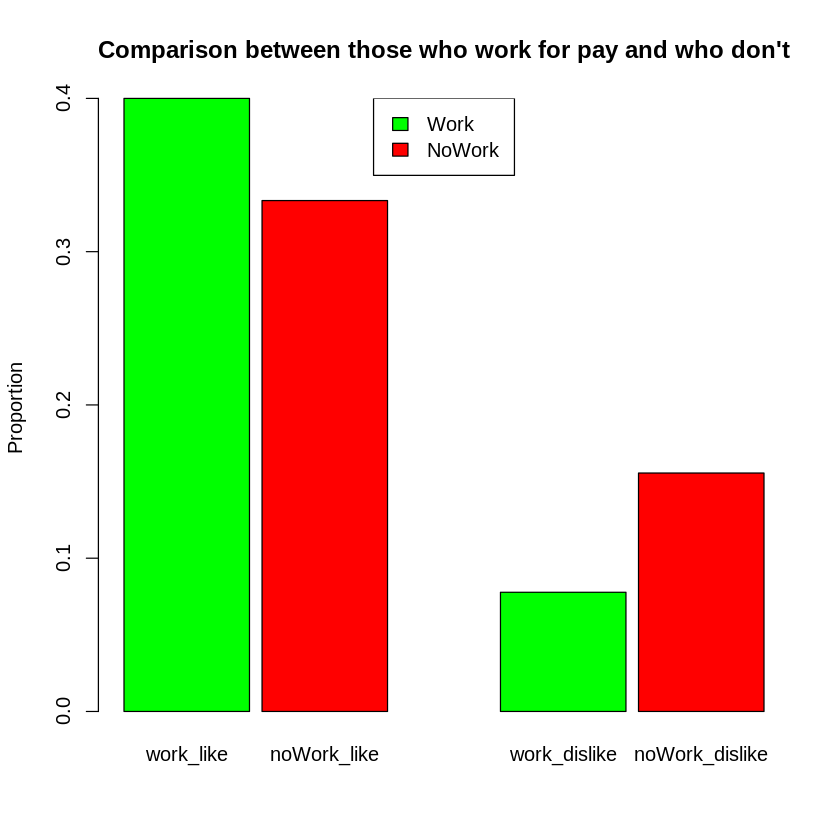

In [ ]:
work_pro_vector = c(work_like_pro, noWork_like_pro, work_dislike_pro, noWork_dislike_pro)
label_vector2 = c("work_like", "noWork_like", "work_dislike", "noWork_dislike")
barplot(work_pro_vector, main = "Comparison between those who work for pay and who don't", ylab = "Proportion", names.arg = label_vector2, col = c("green", "red"), space=c(0.1,0.1,0.9,0.1))
legend("top", c("Work", "NoWork"), cex = 1.0, fill = c("green", "red"))

Comparison between those who own a computer and those who don't

In [ ]:
num_own_like = nrow(like_data[which(like_data$own == 1),])
num_noOwn_like = nrow(like_data[which(like_data$own == 0),])
own_like_pro = num_own_like/(nrow(like_data) + nrow(dislike_data))
noOwn_like_pro = num_noOwn_like/(nrow(like_data) + nrow(dislike_data))
cat("Proportion of those who own a computer and like gaming:", own_like_pro)
cat("\nProportion of those who don't own a computer and like gaming:", noOwn_like_pro)

num_own_dislike = nrow(dislike_data[which(dislike_data$own == 1),])
num_noOwn_dislike = nrow(dislike_data[which(dislike_data$own == 0),])
own_dislike_pro = num_own_dislike/(nrow(like_data) + nrow(dislike_data))
noOwn_dislike_pro = num_noOwn_dislike/(nrow(like_data) + nrow(dislike_data))
cat("\nProportion of those who own a computer and dislike gaming:", own_dislike_pro)
cat("\nProportion of those who don't own a computer and dislike gaming:", noOwn_dislike_pro)

Proportion of those who own a computer and like gaming: 0.5333333
Proportion of those who don't own a computer and like gaming: 0.2333333
Proportion of those who own a computer and dislike gaming: 0.2
Proportion of those who don't own a computer and dislike gaming: 0.03333333

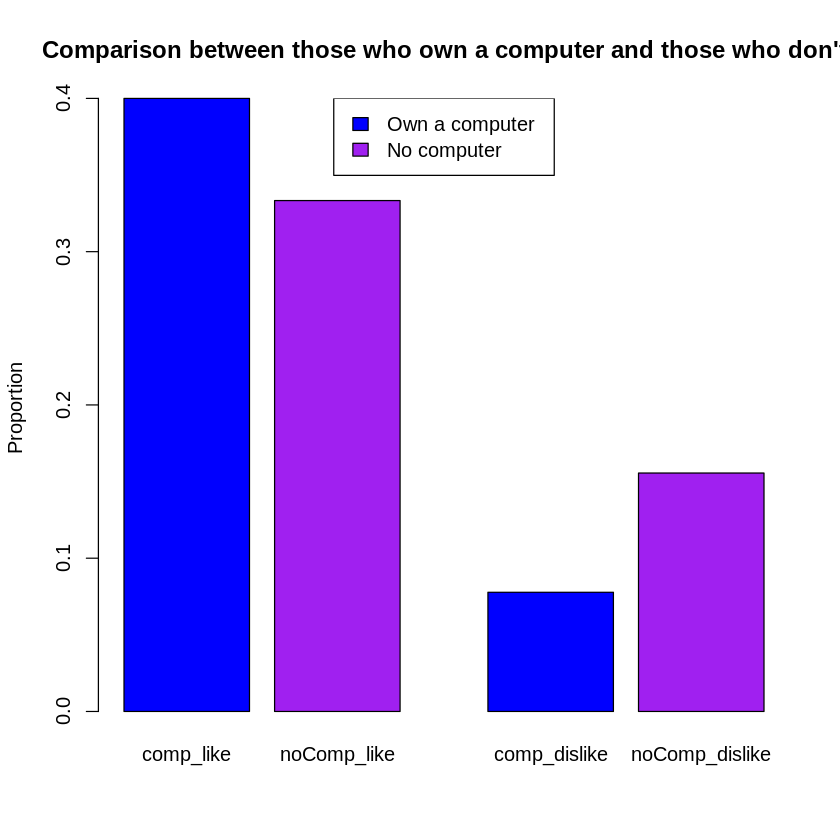

In [ ]:
own_pro_vector = c(own_like_pro, noOwn_like_pro, own_dislike_pro, noOwn_dislike_pro)
label_vector2 = c("comp_like", "noComp_like", "comp_dislike", "noComp_dislike")
barplot(work_pro_vector, main = "Comparison between those who own a computer and those who don't", ylab = "Proportion", names.arg = label_vector2, col = c("blue", "purple"), space=c(0,0.2,0.7,0.2))
legend("top", c("Own a computer", "No computer"), cex = 1.0, fill = c("blue", "purple"))

# Conclusion
1. More males like playing video games than females
2. More females dislike playing video games than males
3. More working students who like to play games than those who do not work (guess it makes sense since majority of the students play game to relax)
4. More non-working students dislike playing video games than working students.
5. More students who own a computer like playing video games than those who don't
6. More students who do not own a computer dislike playing video games than those with a computer


# Chi-square test to determine the relationship between expected grade and actual grade of students

In [ ]:
#get the actual proportion of grade expected
#this is out of 91 respondents
A_proportion = nrow(data[which(data$grade == 4),])
B_proportion = nrow(data[which(data$grade == 3),])
C_proportion = nrow(data[which(data$grade == 2),])
D_F_proportion = nrow(data[which(data$grade == 1 | data$grade == 0),])
actual = c(A_proportion, B_proportion, C_proportion, D_F_proportion)

In [ ]:
type = c(rep(c("expected", "actual"), times = 4))
grade = c(rep(c("A", "B", "C", "D or lower"), each = 2))
proportion = c(0.2*91, A_proportion, 0.3*91, B_proportion, 0.4*91, C_proportion, 0.1*91, D_F_proportion)

In [ ]:
library(ggplot2)

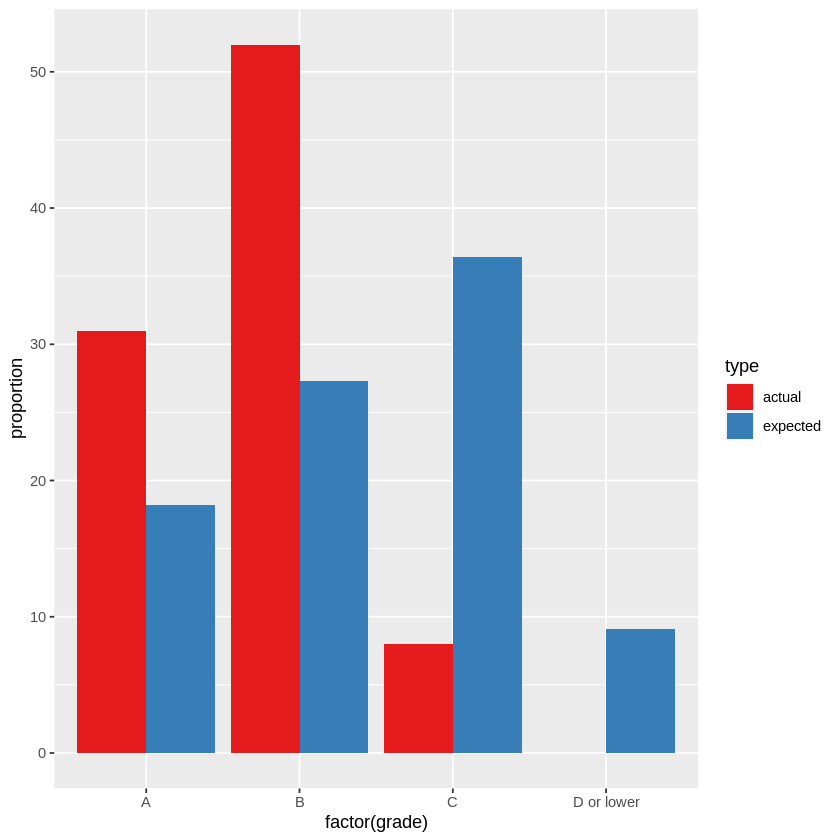

In [ ]:
grade_prop = data.frame(type, grade, proportion)
ggplot(grade_prop, aes(factor(grade), proportion, fill = type)) + 
  geom_bar(stat="identity", position = "dodge") + 
  scale_fill_brewer(palette = "Set1")


Let's try running a Chi-square test:

Null hypothesis: The distribution of the actual grades does not follow the distribution of the expected grades

Alternative hypothesis: The distribution of the actual grades does follow the distribution of the expected grades

In [ ]:
grade_table <- matrix(proportion,ncol=2,byrow=TRUE)
colnames(grade_table) <- c("expected", "actual")
rownames(grade_table) <- c("A", "B", "C", "D or lower")
grade_table <- as.table(grade_table)
grade_table

           expected actual
A              18.2   31.0
B              27.3   52.0
C              36.4    8.0
D or lower      9.1    0.0

In [ ]:
chisq.test(grade_table, correct = FALSE)

Warning message in chisq.test(grade_table, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  grade_table
X-squared = 38.289, df = 3, p-value = 2.455e-08


We have a high chi-square value (38.289) and a very low p-value which is below the significance level of 0.05

With that, we reject the null hypothesis as there is insufficient evidence to prove that the distribution of actual grades does not follow the distribution of expected grades

In [ ]:
expected_total_respondent = 95
num_of_non_respondent = expected_total_respondent - nrow(data)
num_of_non_respondent

[1] 4

In [ ]:
#found that there are 4 students who did not respond to the survey at all
#add 4 students to the grade D or lower
#this is out of 95 respondents
A_adjusted = nrow(data[which(data$grade == 4),])
B_adjusted = nrow(data[which(data$grade == 3),])
C_adjusted = nrow(data[which(data$grade == 2),])
D_F_adjusted = (nrow(data[which(data$grade == 1 | data$grade == 0),]) + num_of_non_respondent)
adjusted1 = c(A_adjusted, B_adjusted, C_adjusted, D_F_adjusted)
adjusted1

[1] 31 52  8  4

In [ ]:
adjusted = c(0.2*expected_total_respondent, A_adjusted, 0.3*expected_total_respondent, B_adjusted, 
0.4*expected_total_respondent, C_adjusted, 0.1*expected_total_respondent, D_F_adjusted)

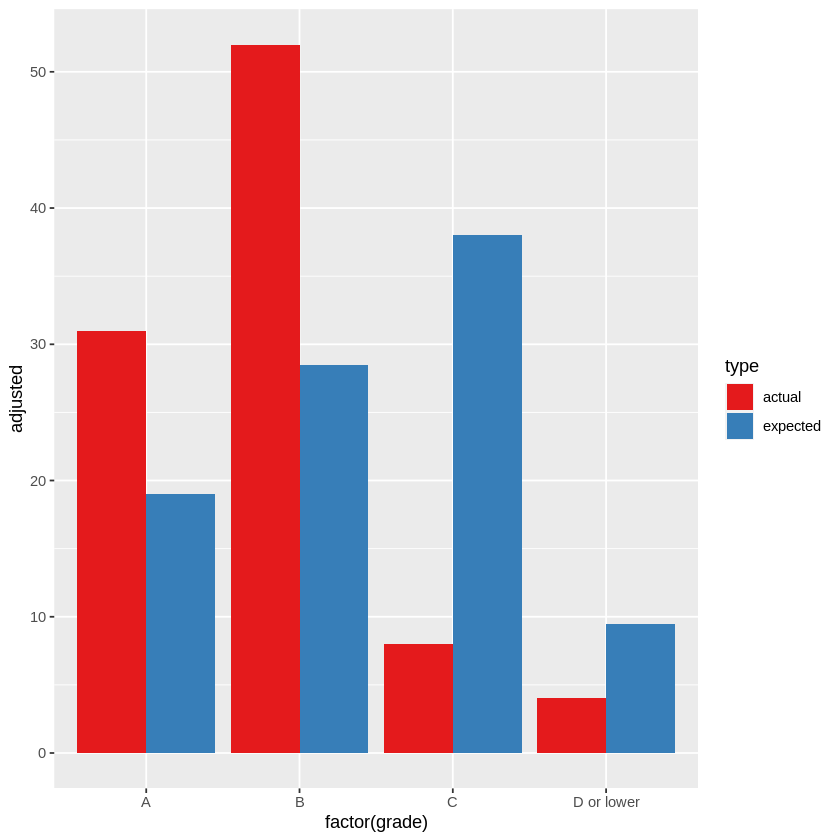

In [ ]:
grade_adjusted = data.frame(type, grade, adjusted)
ggplot(grade_adjusted, aes(factor(grade), adjusted, fill = type)) + 
  geom_bar(stat="identity", position = "dodge") + 
  scale_fill_brewer(palette = "Set1")

Running another Chi-square test on the adjusted table:

Null hypothesis: The distribution of the adjusted actual grades does not follow the distribution of the expected grades

Alternative hypothesis: The distribution of the adjusted actual grades does follow the distribution of the expected grades

In [ ]:
grade_table_adjusted <- matrix(adjusted,ncol=2,byrow=TRUE)
colnames(grade_table_adjusted) <- c("expected", "actual_adjusted")
rownames(grade_table_adjusted) <- c("A", "B", "C", "D or lower")
grade_table_adjusted <- as.table(grade_table_adjusted)
grade_table_adjusted

           expected actual_adjusted
A              19.0            31.0
B              28.5            52.0
C              38.0             8.0
D or lower      9.5             4.0

In [ ]:
chisq.test(grade_table_adjusted, correct = FALSE)


	Pearson's Chi-squared test

data:  grade_table_adjusted
X-squared = 31.546, df = 3, p-value = 6.522e-07


We have a high chi-square value (31.546) and a very low p-value which is below the significance level of 0.05

With that, we reject the null hypothesis as there is insufficient evidence to prove that the distribution of actual grades does not follow the distribution of expected grades

# END OF CODE